# Mathematik für Biologiestudierende

Wintersemester 2025/26

20.01.2026

&copy; 2026 Prof. Dr. Rüdiger W. Braun 

# Klausuranmeldung

Zur Klausur am 26.02.2026 können Sie sich jetzt im [Studierendenportal][1] anmelden.

[1]: https://studierende.hhu.de

# Wiederholung (interaktiv)

Gehen Sie auf die Website

* https://pingo.coactum.de

und geben Sie folgende Zugangsnummer ein

* **670719**

oder scannen Sie den QR-Code

![QR-Code](bilder/qr02.png)

# Themen

* $\chi^2$-Unabhängigkeitsstest 
* Mosaik-Grafik
* Durchführung mit `stats`
* Anwendbarkeit
* Erstellung der Kontingenztafel
* Vierfeldertest
* exakter Test nach Fisher
* $\chi^2$-Anpassungstest

In [1]:
import numpy as np
np.set_printoptions(legacy='1.21')
import seaborn as sns
sns.set_theme()
sns.set_context('talk')
import pandas as pd
from scipy import stats

# Tests für kategorielle Daten

# $\chi^2$-Unabhängigkeitsstest 

* Der Unabhängigkeitstest überprüft, ob zwei Merkmale stochastisch unabhängig sind

* Beispiel:  Hängt die Überlebenswahrscheinlichkeit beim Untergang der Titanic von der Buchungsklasse ab?
* Das ist die Frage nach der stochastischen Unabhängigkeit der Merkmale "überlebt" und "Buchungsklasse"

* Die Zufallsvariablen $X_1, \dots, X_n$ sind unabhängig mit gleicher Verteilung
* Die Zufallsvariablen $Y_1, \dots, Y_n$ sind unabhängig mit gleicher, aber möglicherweise anderer Verteilung
* Die Zufallsvariable $X_j$ beschreibt ein Merkmal mit den Ausprägungen $w_1, \dots, w_s$  
* Die Zufallsvariable $Y_j$ beschreibt ein Merkmal mit den Ausprägungen $v_1, \dots, v_r$
* Die Nullhypothese ist $P(X_1=w_\ell,\,Y_1=v_k) = P(X_1=w_\ell) \cdot P(Y_1=v_k)$ für alle Wahlen von $k$ und $\ell$ 

## Beispiel: Geschlechterverteilung in verschiedenen Fächern
   
Die Tafel zeigt die eingeschriebenen Erstsemester in einigen Fächern, sortiert nach Geschlecht

|                | Biologie | Biochemie | Chemie | Pharmazie |
|:---------------|----------|-----------|--------|-----------|
| weiblich       | 237      | 31        | 136    | 56        |
| nicht weiblich | 117      | 20        | 104    | 21        |

Daten des WS 24/25, Quelle: https://www.hhu.de/die-hhu/profil/facts-figures/die-universitaet-in-zahlen/studierendenstatistik

<!--| Summe          | 354      | 51       | 240    | 77        |  -->

* Frage: Unterscheiden sich die Geschlechterverhältnisse zwischen den Fächern signifikant zum Niveau $\alpha = 0.05$
* Das ist die Frage nach der Unabhängigkeit der Merkmale "Studienfach" und "Geschlecht"

## Kontingenztafel

* Die oben abgebildete Tafel heißt *Kontingenztafel*
* Wir geben sie als DataFrame ein

In [2]:
tafel = pd.DataFrame(index=['weiblich', 'nicht weiblich'])
tafel['Biologie'] = [237, 117]
tafel['Biochemie'] = [31, 20]
tafel['Chemie'] = [136, 104]
tafel['Pharmazie'] = [56, 21]
tafel

,Biologie,Biochemie,Chemie,Pharmazie
weiblich,237,31,136,56
nicht weiblich,117,20,104,21


In [3]:
from statsmodels.graphics.mosaicplot import mosaic

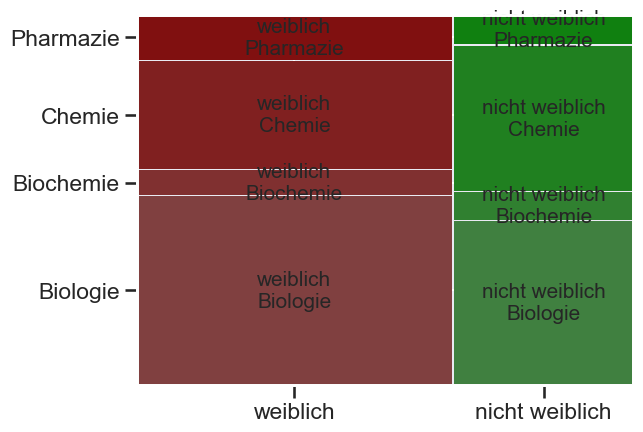

In [4]:
mosaic(tafel.stack());

`tafel.stack()` ist die Langform der Tabelle

In [5]:
tafel.stack()

weiblich        Biologie     237
                Biochemie     31
                Chemie       136
                Pharmazie     56
nicht weiblich  Biologie     117
                Biochemie     20
                Chemie       104
                Pharmazie     21
dtype: int64

Die ursprüngliche Kontingenztafel wird später noch gebraucht

In [6]:
df = tafel.copy()   #  df = tafel würde nur einen zweiten Namen vergeben

### Spaltensummen

In [7]:
df.sum()

Biologie     354
Biochemie     51
Chemie       240
Pharmazie     77
dtype: int64

In [8]:
df.loc['Summe'] = df.sum()
df

,Biologie,Biochemie,Chemie,Pharmazie
weiblich,237,31,136,56
nicht weiblich,117,20,104,21
Summe,354,51,240,77


* `df.loc` ändert die **Zeile** mit dem entsprechenden Namen
* wenn sie noch nicht existiert, dann wird die hinzugefügt

### Zeilensummen

In [9]:
df.sum(axis=1)

weiblich          460
nicht weiblich    262
Summe             722
dtype: int64

In [10]:
df['Stud_insgesamt'] = df.sum(axis=1)
df

,Biologie,Biochemie,Chemie,Pharmazie,Stud_insgesamt
weiblich,237,31,136,56,460
nicht weiblich,117,20,104,21,262
Summe,354,51,240,77,722


Die Wahrscheinlichkeit, dass eine studierende Person weiblich ist, ist

In [11]:
p_w = 460 / 722
p_w

0.6371191135734072

Die Wahrscheinlichkeit, dass eine Person Biologie studiert, ist

In [12]:
p_bio = 354 / 722
p_bio

0.4903047091412742

Wenn Studienwahl und Geschlecht unabhängig sind, erwartet man im linken oberen Feld der Tafel den folgenden Wert

In [13]:
p_w * p_bio * 722

225.54016620498615

* Tatsächlich gibt es aber 237 weibliche Studierende der Biologie
* Ist das signifikant?

* Wie groß sind diese Abweichungen in den anderen Fächern?

In [14]:
n = df.loc['Summe'].Stud_insgesamt
n

722

In [15]:
p_faecher = df.loc['Summe'] / n
p_faecher

Biologie          0.490305
Biochemie         0.070637
Chemie            0.332410
Pharmazie         0.106648
Stud_insgesamt    1.000000
Name: Summe, dtype: float64

In [16]:
p_geschlecht = df.Stud_insgesamt / n
p_geschlecht

weiblich          0.637119
nicht weiblich    0.362881
Summe             1.000000
Name: Stud_insgesamt, dtype: float64

## Tafel der erwarteten Werte

In [17]:
erwartet = pd.DataFrame(index = tafel.index)

In [18]:
erwartet['Biologie'] = n * p_faecher['Biologie'] * p_geschlecht
erwartet['Biochemie'] = n * p_faecher['Biochemie'] * p_geschlecht
erwartet['Chemie'] = n * p_faecher['Chemie'] * p_geschlecht
erwartet['Pharmazie'] = n * p_faecher['Pharmazie'] * p_geschlecht
erwartet

,Biologie,Biochemie,Chemie,Pharmazie
weiblich,225.540166,32.493075,152.908587,49.058172
nicht weiblich,128.459834,18.506925,87.091413,27.941828


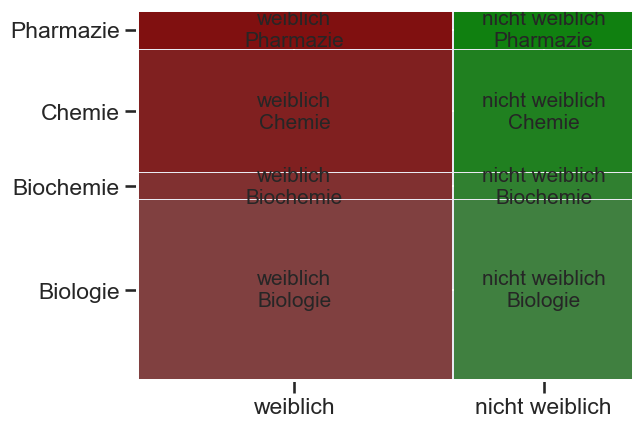

In [19]:
mosaic(erwartet.stack());

Das ist das Bild, wenn die beiden Zufallsvariablen unabhängig sind

Das tatsächliche Bild ist 

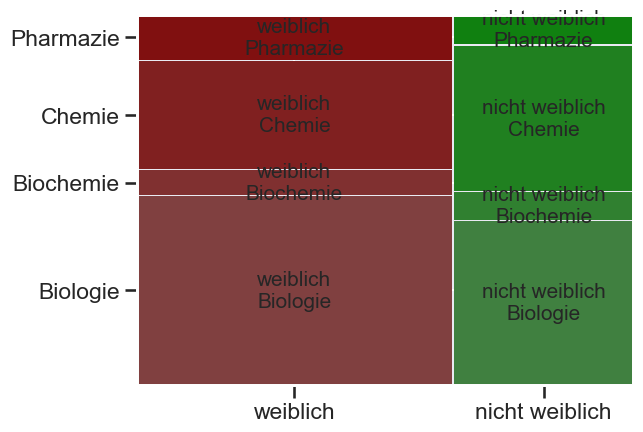

In [20]:
mosaic(tafel.stack());

## Tabelle der Differenzen

In [21]:
tafel - erwartet

,Biologie,Biochemie,Chemie,Pharmazie
weiblich,11.459834,-1.493075,-16.908587,6.941828
nicht weiblich,-11.459834,1.493075,16.908587,-6.941828


* Weil es fünfmal so viele Biologiestudierende wie Pharmaziestudierende gibt, ist der Unterschied von 7 Studierenden in der Pharmazie gewichtiger als der von 11 in der Biologie
* wir müssen die Differenzen normieren

* dabei werden die Differenzen quadriert und durch die erwarteten Werte geteilt

## Tabelle der normierten Differenzen

In [22]:
normierte_differenzen = (tafel-erwartet)**2 / erwartet
normierte_differenzen

,Biologie,Biochemie,Chemie,Pharmazie
weiblich,0.582281,0.068608,1.869747,0.982282
nicht weiblich,1.022326,0.120456,3.282761,1.724618


jetzt müssen wir wieder die Summen ausrechnen

In [23]:
normierte_differenzen.loc['Summe'] = normierte_differenzen.sum()
normierte_differenzen

,Biologie,Biochemie,Chemie,Pharmazie
weiblich,0.582281,0.068608,1.869747,0.982282
nicht weiblich,1.022326,0.120456,3.282761,1.724618
Summe,1.604607,0.189064,5.152508,2.706900


In [24]:
t = sum(normierte_differenzen.loc['Summe'])
t

9.653079025502825

* Das ist die Teststatistik
* Die Teststatistik ist die Summe über alle Einträge der Tabelle der erwarteten Differenzen

# $\chi^2$-Verteilung

* Die zum $\chi^2$-Unabhängigkeitstest gehörende Verteilung ist die $\chi^2$-Verteilung
* Sie wird aufgerufen als `stats.chi2`
* Sie ist abhängig von der Zahl der Freiheitsgrade
* Wenn die Kontingenztafel $r$ Zeilen und $c$ Spalten hat, dann ist die Zahl der Freiheitsgrade gleich $(r-1) \cdot (c-1)$

* Im Beispiel ist das $(2-1) \cdot (4-1) = 3$ 

In [25]:
P = stats.chi2(3)

In [26]:
p = 1 - P.cdf(t)
p

0.021757400637373303

* Der *p*-Wert beträgt 0.022
* Der Unterschied ist signifikant zum Signifikanzniveau $\alpha=0.05$

# Berechnung mit `stats`

* Das geht auch automatisch
* Achtung:  Es muss die ursprüngliche Kontingenztafel ohne hinzugefügte Summenzeilen oder -spalten verwendet werden

In [27]:
res = stats.chi2_contingency(tafel)
res

Chi2ContingencyResult(statistic=9.65307902550282, pvalue=0.021757400637373383, dof=3, expected_freq=array([[225.5401662 ,  32.49307479, 152.90858726,  49.05817175],
       [128.4598338 ,  18.50692521,  87.09141274,  27.94182825]]))

In [28]:
res.pvalue

0.021757400637373383

In [29]:
res.statistic

9.65307902550282

Tabelle der erwarteten Werte (aber ohne Überschriften)

In [30]:
pd.DataFrame(res.expected_freq)

,0,1,2,3
0,225.540166,32.493075,152.908587,49.058172
1,128.459834,18.506925,87.091413,27.941828


außerhalb der Wertung

In [31]:
pd.DataFrame(res.expected_freq, columns=tafel.columns, index=tafel.index)

,Biologie,Biochemie,Chemie,Pharmazie
weiblich,225.540166,32.493075,152.908587,49.058172
nicht weiblich,128.459834,18.506925,87.091413,27.941828


Zahl der Freiheitsgrade

In [32]:
res.dof

3

## Anwendbarkeit

* Der $\chi^2$-Unabhängigkeitstest beruht auf einer Approximation
* Er ist nur zulässig, wenn alle erwarteten Werte mindestens den Wert 5 haben

### Erstellung der Kontingenztafel aus einem Datensatz

In [33]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


* Sind die Reisenden der veschiedenen Klassen mit unterschiedlichen Wahrscheinlichkeiten an den verschiedenen Orten eingestiegen?
* Das ist eine Frage für einen $\chi^2$-Unabhängigkeitstest

In [34]:
tafel = pd.crosstab(df.pclass, df.embark_town)
tafel

embark_town,Cherbourg,Queenstown,Southampton
pclass,,,
1,85,2,127
2,17,3,164
3,66,72,353


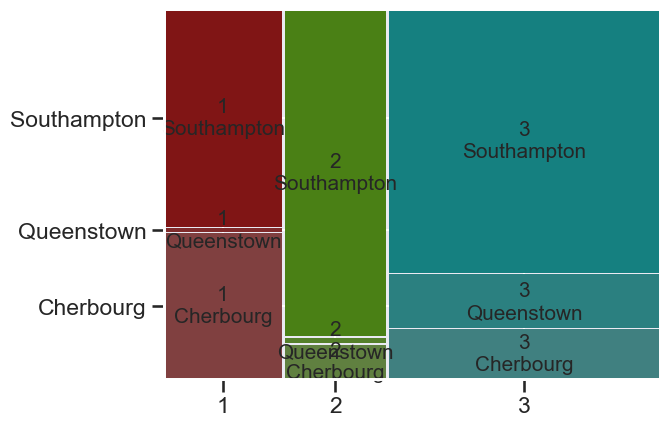

In [35]:
mosaic(tafel.stack());

In [36]:
res = stats.chi2_contingency(tafel)

In [37]:
res.pvalue

8.435267819894384e-26

Ist der $\chi^2$-Unabhängigkeitstest überhaupt anwendbar?

In [38]:
pd.DataFrame(res.expected_freq)

,0,1,2
0,40.440945,18.535433,155.023622
1,34.771654,15.937008,133.291339
2,92.787402,42.527559,355.685039


* tatsächlich sind alle Einträge größer als 5
* obwohl in Queenstown tatsächlich nur 2 Leute in die erste Klasse eingestiegen sind

### Warum funktioniert folgendes nicht?

In [39]:
# pd.crosstab(df.class, df.embark_town)  # invalid syntax

## Python:  reservierte Worte

* Einige Worte wie `import` und `def` können nicht als Variablennamen verwendet werden

* Dazu gehört auch `class`

* Das ist die Ursache des Fehlers

* Aber als Text dürfen reservierte Wörter sehr wohl vorkommen

In [40]:
pd.crosstab(df['class'], df.embark_town)

embark_town,Cherbourg,Queenstown,Southampton
class,,,
First,85,2,127
Second,17,3,164
Third,66,72,353


# Vierfeldertest

Der $\chi^2$-Unabhängigkeitstest mit zwei Zeilen und zwei Spalten heißt *Vierfeldertest*

In [41]:
tafel = pd.DataFrame(index=['Tag', 'Dämmerung'])
tafel['Mauerbienen'] = [131, 7]
tafel['Holzbienen'] = [18, 4]
tafel

,Mauerbienen,Holzbienen
Tag,131,18
Dämmerung,7,4


Unterscheidet sich die Wahrscheinlichkeit, eine Biene in der Dämmerung anzutreffen, für Mauer- und Holzbienen?

In [42]:
res = stats.chi2_contingency(tafel)

In [43]:
pd.DataFrame(res.expected_freq)

,0,1
0,128.5125,20.4875
1,9.4875,1.5125


Die erwartete Anzahl von Holzbienen in der Dämmerung ist kleiner als 5.  Der $\chi^2$-Unabhängigkeitstest ist nicht anwendbar.

# Exakter Test nach Fisher

* Eine Alternative zum Vierfeldertest ist der exakte Test von Fischer

In [44]:
stats.fisher_exact(tafel)

SignificanceResult(statistic=4.158730158730159, pvalue=0.046533029009005966)

* der exakte Test nach Fisher ist ein Permutationstest
* er ist nicht-parametrisch
* der *p*-Wert wird berechnet, indem alle möglichen Versuchsausgänge simuliert werden

* ich werde darüber sprechen, wenn zum Schluss noch Zeit ist

# Der $\chi^2$-Anpassungstest

auch $\chi^2$-Verteilungsstest genannt

### Beispiel Geburten pro Wochentag

In einem Krankenhaus wurden im Jahr 1999 die folgenden Anzahlen an Geburten beobachtet

| Wochentag | Tage im Jahr | Anzahl Geburten |
|:----------|--------------|-----------------|
| Montag    | 52           | 41              |
| Dienstag  | 52           | 63              |
| Mittwoch  | 52           | 63              |
| Donnerstag| 52           | 47              |
| Freitag   | 53           | 56              |
| Samstag   | 52           | 47              |
| Sonntag   | 52           | 33              |

* Sind diese Zahlen mit der Nullhypothese vereinbar, dass Geburten an allen Wochentagen gleich häufig auftreten?  
* Diese Frage soll zum Signifikanzniveau $\alpha = 0.05$ beantwortet werden.

# Anpassungstest

Test auf Übereinstimmung der Daten mit einer Verteilung

* Unabhängige Zufallsvariable $X_1, \dots, X_n $, die alle mit Wahrscheinlichkeit $p_1$ den Wert $w_1$, mit Wahrscheinlichkeit $p_2$ den Wert $w_2$, ... und mit Wahrscheinlichkeit $p_s$ den Wert $w_s$ annehmen
* Vergleichswahrscheinlichkeiten $\pi_1, \pi_2, \dots, \pi_s$ mit $\pi_1 + \pi_2 + \dots + \pi_s = 1$
* Nullhypothese und Alternative:
  * $H_0$: $p_1 = \pi_1, p_2 = \pi_2, \dots, p_s = \pi_s$
  * $H_1$: mindestens ein $p_j \ne \pi_j$

* $y_1$ Anzahl, wie oft $w_1$ aufgetreten ist
* $y_2$ anzahl, wie oft $w_2$ aufgetreten ist
* ...
* erwarteter Wert für $y_1$ ist $n\pi_1$
* erwarteter Wert für $y_2$ ist $n\pi_2$
* ...

* Die Anzahl der Freiheitsgrade ist $s-1$
* Der p-Wert ist $1-\chi^2_{s-1}(t)$ 

#### Weiter im Beispiel

In [45]:
tafel = pd.DataFrame(index=['Mo', 'Di', 'Mi', 'Do', 'Fr', 'Sa', 'So'])
tafel['Tage'] = [52, 52, 52, 52, 53, 52, 52]
tafel['Geburten'] = [41, 63, 63, 47, 56, 47, 33]
tafel

,Tage,Geburten
Mo,52,41
Di,52,63
Mi,52,63
Do,52,47
Fr,53,56
Sa,52,47
So,52,33


In [46]:
n = tafel.Geburten.sum()
n

350

## Tabelle der erwarteten Werte

In [47]:
tafel['erwartet'] = tafel.Tage*n/365
tafel.round(2)

,Tage,Geburten,erwartet
Mo,52,41,49.86
Di,52,63,49.86
Mi,52,63,49.86
Do,52,47,49.86
Fr,53,56,50.82
Sa,52,47,49.86
So,52,33,49.86


## Tabelle der normierten Differenzen

In [48]:
tafel['Differenz'] = tafel.Geburten - tafel.erwartet
tafel['normierte Differenz'] = tafel.Differenz**2 / tafel.erwartet
tafel

,Tage,Geburten,erwartet,Differenz,normierte Differenz
Mo,52,41,49.863014,-8.863014,1.575376
Di,52,63,49.863014,13.136986,3.461091
Mi,52,63,49.863014,13.136986,3.461091
Do,52,47,49.863014,-2.863014,0.164387
Fr,53,56,50.821918,5.178082,0.527578
Sa,52,47,49.863014,-2.863014,0.164387
So,52,33,49.863014,-16.863014,5.702849


Teststatistik

In [49]:
t = tafel['normierte Differenz'].sum()
t

15.05675927845739

In [50]:
P = stats.chi2(6)
1 - P.cdf(t)

0.01981981977372671

Der *p*-Wert beträgt ungefähr 0.02

## Dasselbe komplett mit `stats`

In [51]:
res = stats.chisquare(tafel.Geburten, tafel.erwartet)
res

Power_divergenceResult(statistic=15.05675927845739, pvalue=0.01981981977372675)